In [1]:
from sklearn import tree
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 

In [2]:
# Read CSV file in pandas
df_bp = pd.read_csv("BloodPressure_train.csv")
df_bp.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,30669,Male,3.0,0,0,No,children,Rural,95.12,18.0,NaN,0
1,30468,Male,58.0,1,0,Yes,Private,Urban,87.96,39.2,never smoked,0
2,16523,Female,8.0,0,0,No,Private,Urban,110.89,17.6,NaN,0
3,56543,Female,70.0,0,0,Yes,Private,Rural,69.04,35.9,formerly smoked,0
4,46136,Male,14.0,0,0,No,Never_worked,Rural,161.28,19.1,NaN,0


In [3]:
# Check number of rows and columns in the dataframe
df_bp.shape

(43400, 12)

In [4]:
# Change dichotomous strings to '0' and '1's
df_bp['gender'].replace('Male',1, inplace=True)
df_bp['gender'].replace('Female',0, inplace=True)
df_bp['gender'].replace('Other',0,inplace=True)

df_bp['ever_married'].replace('Yes',1, inplace=True)
df_bp['ever_married'].replace('No',0, inplace=True)

df_bp['Residence_type'].replace('Urban',1, inplace=True)
df_bp['Residence_type'].replace('Rural',0, inplace=True)

df_bp['smoking_status'].replace('smokes',1, inplace=True)
df_bp['smoking_status'].replace('never smoked',0, inplace=True)
df_bp['smoking_status'].replace('formerly smoked',1, inplace=True)

In [5]:
# Read dataframe
df_bp.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,30669,1,3.0,0,0,0,children,0,95.12,18.0,NaN,0
1,30468,1,58.0,1,0,1,Private,1,87.96,39.2,0.0,0
2,16523,0,8.0,0,0,0,Private,1,110.89,17.6,NaN,0
3,56543,0,70.0,0,0,1,Private,0,69.04,35.9,1.0,0
4,46136,1,14.0,0,0,0,Never_worked,0,161.28,19.1,NaN,0


In [6]:
# Drop columns that are not relevant
BPdata = df_bp.drop(["id","work_type"], axis=1)
feature_names = BPdata.columns
BPdata.head()

,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,3.0,0,0,0,0,95.12,18.0,NaN,0
1,1,58.0,1,0,1,1,87.96,39.2,0.0,0
2,0,8.0,0,0,0,1,110.89,17.6,NaN,0
3,0,70.0,0,0,1,0,69.04,35.9,1.0,0
4,1,14.0,0,0,0,0,161.28,19.1,NaN,0


In [7]:
# Repalce NaNs with zeros
BPdata=BPdata.fillna(0.0)

In [8]:
# Check number of non-zeros in each column
BPdata.astype(bool).sum(axis=0)

gender               17724
age                  43400
hypertension          4061
heart_disease         2062
ever_married         27938
Residence_type       21756
avg_glucose_level    43400
bmi                  41938
smoking_status       14055
stroke                 783
dtype: int64

In [9]:
# Number of rows and columns in the cleaned dataframe
BPdata.shape

(43400, 10)

In [10]:
# Check data types of columns
print(BPdata.dtypes)

gender                 int64
age                  float64
hypertension           int64
heart_disease          int64
ever_married           int64
Residence_type         int64
avg_glucose_level    float64
bmi                  float64
smoking_status       float64
stroke                 int64
dtype: object


In [11]:
# Get statistical details of each column in the dataframe
BPdata.describe()

,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
count,43400.000000,43400.000000,43400.000000,43400.000000,43400.000000,43400.000000,43400.000000,43400.000000,43400.000000,43400.000000
mean,0.408387,42.217894,0.093571,0.047512,0.643733,0.501290,104.482750,27.641431,0.323848,0.018041
std,0.491541,22.519649,0.291235,0.212733,0.478901,0.500004,43.111751,9.218216,0.467948,0.133103
min,0.000000,0.080000,0.000000,0.000000,0.000000,0.000000,55.000000,0.000000,0.000000,0.000000
25%,0.000000,24.000000,0.000000,0.000000,0.000000,0.000000,77.540000,22.700000,0.000000,0.000000
50%,0.000000,44.000000,0.000000,0.000000,1.000000,1.000000,91.580000,27.500000,0.000000,0.000000
75%,1.000000,60.000000,0.000000,0.000000,1.000000,1.000000,112.070000,32.600000,1.000000,0.000000
max,1.000000,82.000000,1.000000,1.000000,1.000000,1.000000,291.050000,97.600000,1.000000,1.000000


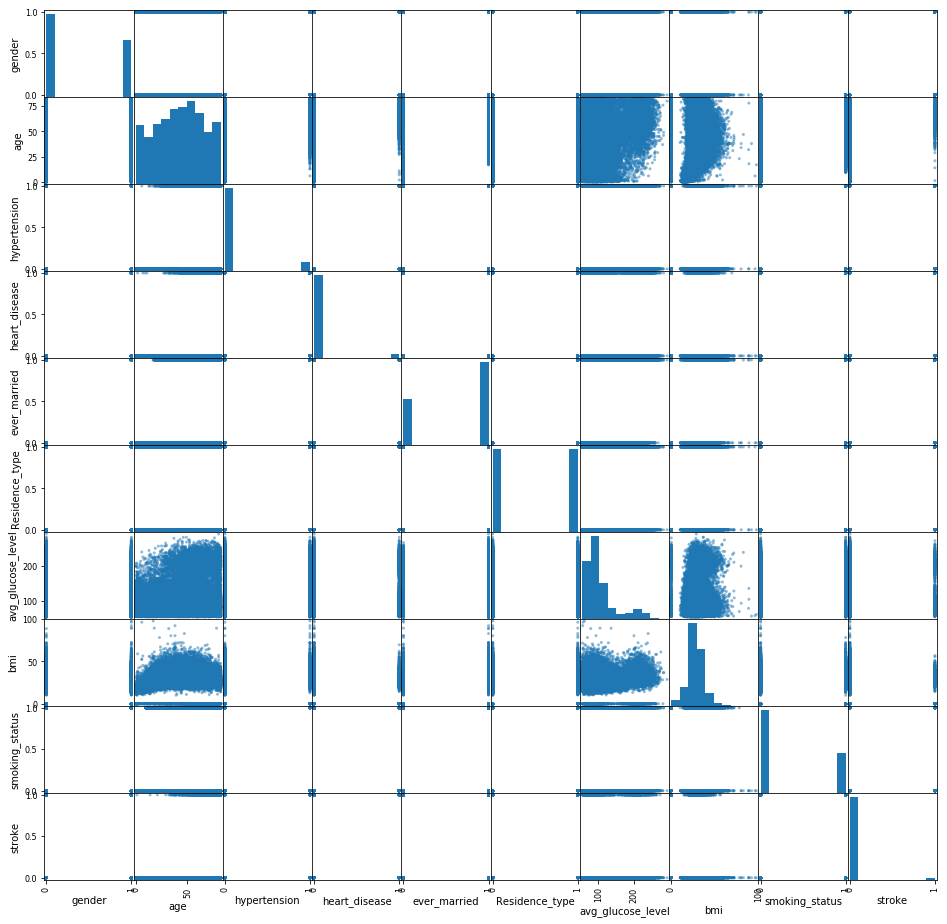

In [12]:
# Show pairwise scatter plot matrix
from pandas.plotting import scatter_matrix

plt.rcParams["figure.figsize"] = (16,16)
scatter_matrix(BPdata)
plt.show()

In [13]:
# Select X and y data from the dataset
X = BPdata.iloc[:, 0:9].values  
y = BPdata.iloc[:, 9].values  

In [14]:
# Check various ML models
import scipy
import sklearn
import pandas
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

# Check various ML Models
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))
# evaluate each model in turn
validation_size = 0.20
seed=7
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y,test_size=validation_size, random_state=seed)
scoring = 'accuracy'

results = []
names = []
for name, model in models:
        kfold = model_selection.KFold(n_splits=10, random_state=seed)
        cv_results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
        results.append(cv_results)
        names.append(name)
        model.fit(X_train, y_train)
        predictions = model.predict(X_test)
        msg = "%s: %f (%f), %f" % (name, cv_results.mean(), cv_results.std(), accuracy_score(y_test, predictions))
        print(msg)

LR: 0.981740 (0.001827), 0.982834
LDA: 0.976354 (0.001642), 0.978111
KNN: 0.980789 (0.001771), 0.982258
CART: 0.962615 (0.004071), 0.965092
NB: 0.914487 (0.004250), 0.919931
SVM: 0.981653 (0.001747), 0.982949


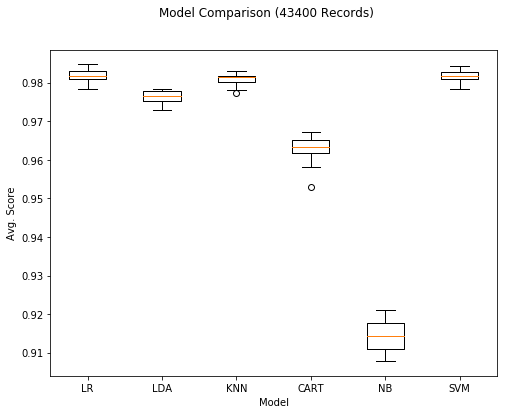

In [15]:
# Compare ML model results(scores) using Matplotlib
plt.rcParams["figure.figsize"] = (8,6)

fig = plt.figure()
fig.suptitle('Model Comparison (43400 Records)')
ax = fig.add_subplot(111)
plt.boxplot(results)
plt.ylabel('Avg. Score')
plt.xlabel('Model')
ax.set_xticklabels(names)

plt.show()

In [16]:
# Prediction based on inputs
lr = LogisticRegression()
lr.fit(X_train, y_train)
# gender, age, hypertension, heart disease, ever married, residence type, glucose level, bmi, smoking status
X= [[1, 80, 1, 0, 1, 1, 300, 30, 1]]

predictions = lr.predict(X)
print("Stroke Probability(0:Lo, 1:Hi):", predictions)

Stroke Probability(0:Lo, 1:Hi): [0]
